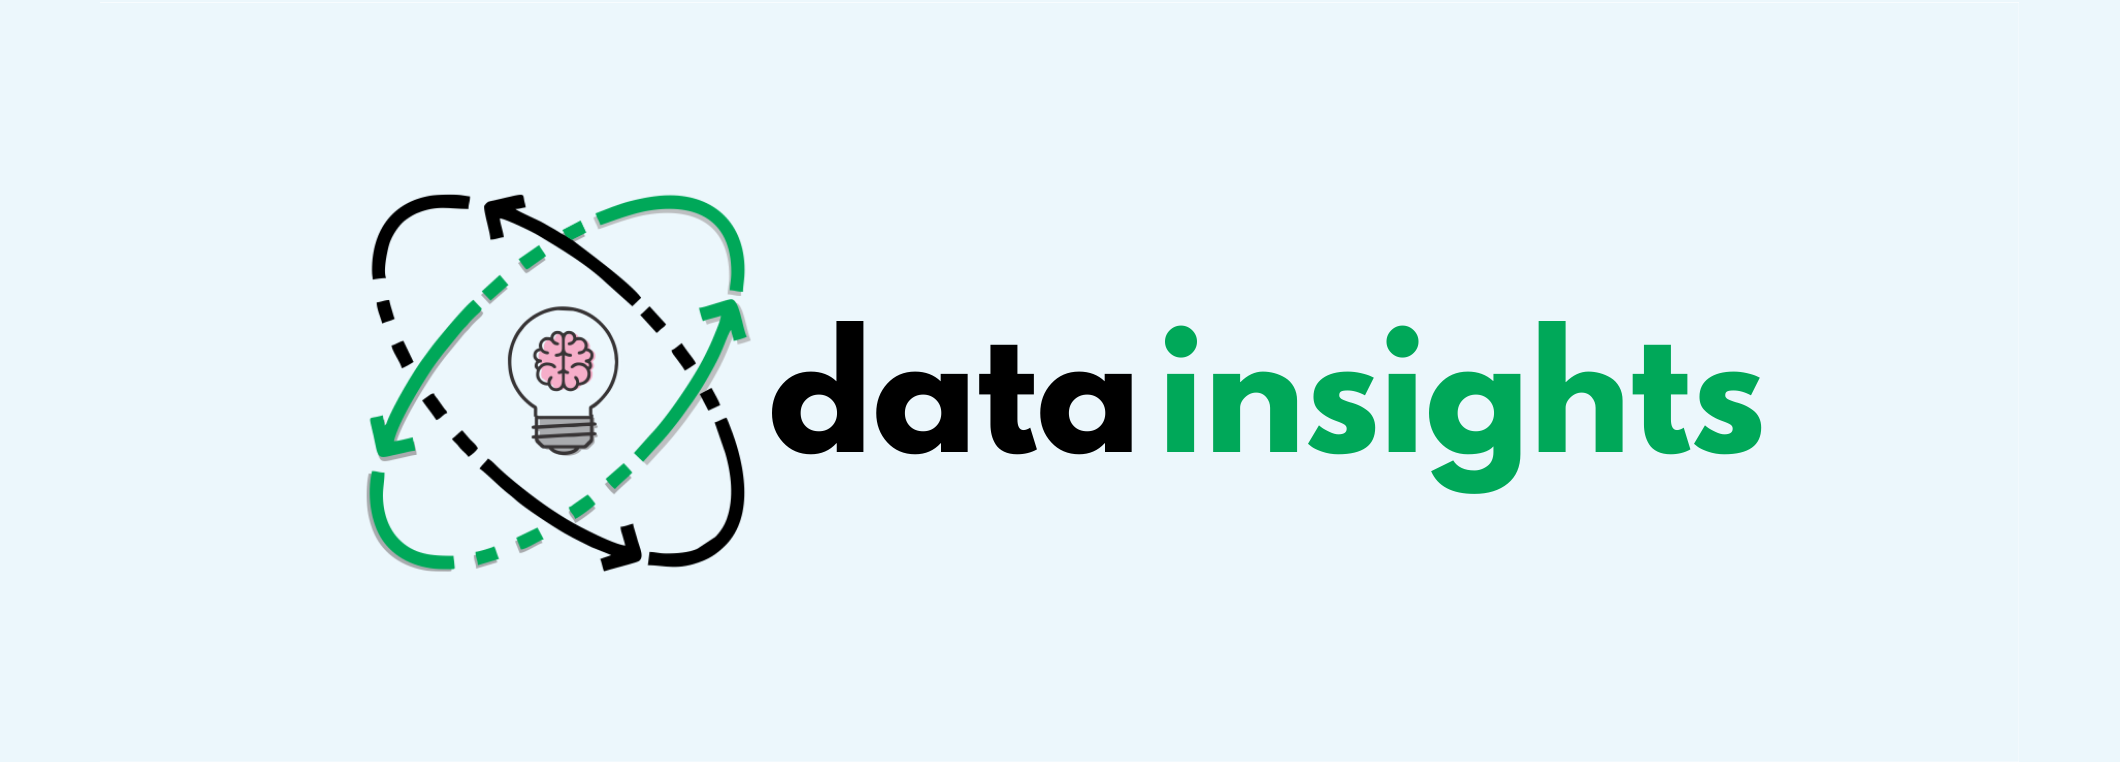

<h1 style="text-align: center; color: #00A859"> Projeto Análise Exploratória de Dados
Socioeconômicos </h1>

<div class="alert alert-block alert-info" style="background-color: #EDF8FD; color: #4F4F4F;" ><font size="3">
    <h3>Project Description:</h3> 

A análise de dados socioeconômicos é uma atividade fundamental para qualquer empresa que busca compreender como as mudanças no cenário podem impactar suas estratégias corporativas e, consequentemente, auxilia na tomada de decisões mais informadas e assertivas.

A descrição dos dados utilizados estão no arquivo <a style="text-decoration: none;" href="https://data.world/laurel/world-happiness-report-data">DictionaryData.ipynb</a>  na pasta 01-Documentacao. 
</font> 
</div>

<font size="5"><a id="sumario"><bold>Summary</bold></a></font>
***
>1. [Importação das Bibliotecas](#ses1)
>2. [Carregando os Dados](#ses2)
>3. [Preparação dos Dados](#ses3)

<font size="5"><a id="sumario"><bold>Imports</bold></a></font>

[Voltar](#sumario)

<h3 style="color: #00A859">Section Description</h3> 

Importações das bibliotecas utilizadas para o desenvolvimento desse notebook e algumas configurações de saídas de códigos.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import zipfile
from glob import glob
from sklearn.impute import SimpleImputer

In [2]:
# Versão da Linguagem Python

from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print("")

# Versões de pacotes utilizados 

%reload_ext watermark
%watermark -a "Data Scientist" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.8

Author: Data Scientist

pandas    : 1.5.2
numpy     : 1.22.4
matplotlib: 3.6.2
seaborn   : 0.12.1



In [3]:
# Para ignorar mensagens de alertas 

warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

# Visualizar todas as colunas do dataset

pd.set_option('display.max_columns', None)

<h1 style="text-align:center;" ><a id="ses3">Funções</a></h1>

[VOLTAR](#sumario)

In [4]:
def clean_columns (x: pd.DataFrame):
    """
    Função para limpar e organizar os nomes das colunas
    
    x: dataframe no qual os nomes das colunas serão limpadas 
    
    """
    if isinstance(x, pd.DataFrame):
        x.columns = x.columns.str.replace(" ", "_").str.title().str.strip().str.lower()
    
    else:
        raise Exception('O tipo da variável deve ser pandas.core.frame.DataFrame. O tipo dado foi: {}'.format(type(x)))

In [5]:
def rename_columns(df: pd.DataFrame, new_columns: list):
    """
    Função para renomear as colunas de um DataFrame de acordo com uma lista de nomes definidas
    
    df: dataframe no qual as colunas serão renomeadas
    new_columns: lista com os novos nomes das colunas, na ordem desejada
    """
    if isinstance(df, pd.DataFrame):
        if len(new_columns) == len(df.columns):
            df.columns = new_columns
        else:
            raise ValueError('A lista de novos nomes deve ter o mesmo número de elementos que o número de colunas do DataFrame')
    else:
        raise TypeError('O tipo da variável deve ser pandas.core.frame.DataFrame. O tipo dado foi: {}'.format(type(df)))


<h1 style="text-align:center;" ><a id="ses3">Coleta de Dados </a></h1>

[VOLTAR](#sumario)

In [6]:
# Caminho dos dados 

path = r"C:/Projetos/AnaliseExploratoria_SocioEconomico/02-CodigoFonte/00-DataSets/"

In [7]:
data_socio = pd.read_csv(path + 'dataset.csv')
data_socio.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# Processamento/Limpeza dos dados

In [8]:
# Dimensão do dataset (linhas e colunas)

data_socio.shape

(1949, 11)

In [9]:
# Limpando e padronizando os nomes das colunas 

clean_columns(data_socio)

In [10]:
# estatística básica

data_socio.describe()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [11]:
# Valores ausentes

data_socio[data_socio.isnull().any(axis=1)]

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
66,Australia,2005,7.341,10.659,0.968,71.40,0.935,NaN,0.390,0.843,0.238
110,Bahrain,2012,5.027,10.716,0.911,66.86,0.682,NaN,0.438,0.589,0.381
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477,8.214,0.825,53.40,0.673,0.011,NaN,0.592,0.379
1916,Yemen,2016,3.826,7.715,0.775,55.10,0.533,-0.151,NaN,0.469,0.228
1917,Yemen,2017,3.254,7.578,0.790,55.90,0.595,-0.147,NaN,0.455,0.295
1918,Yemen,2018,3.058,NaN,0.789,56.70,0.553,NaN,0.793,0.461,0.315


In [12]:
# Porcentagem por coluna de valores ausentes

percent_missing = data_socio.isnull().sum() * 100 / len(data_socio)

missing_value_df = pd.DataFrame({'qtd_missing': data_socio.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'column_type': data_socio.dtypes}
                               ).reset_index().rename(columns={'index': 'column_name'})

missing_value_df

,column_name,qtd_missing,percent_missing,column_type
0,country_name,0,0.000000,object
1,year,0,0.000000,int64
2,life_ladder,0,0.000000,float64
3,log_gdp_per_capita,36,1.847101,float64
4,social_support,13,0.667009,float64
5,healthy_life_expectancy_at_birth,55,2.821960,float64
6,freedom_to_make_life_choices,32,1.641868,float64
7,generosity,89,4.566444,float64
8,perceptions_of_corruption,110,5.643920,float64
9,positive_affect,22,1.128784,float64


Como os as porcentagem de valores ausentes são baixos, então será feita uma tratativa de subtituir os valores NAs pela ,édia da coluna.

In [13]:
# Substituindo os NAs pela média de cada coluna 

imp_object = SimpleImputer(missing_values=np.nan, strategy='mean')
colunas_object = data_socio.select_dtypes(include=['float64']).columns

data_socio[colunas_object] = imp_object.fit_transform(data_socio[colunas_object])
data_socio.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [14]:
# matriz de correlação 

data_socio[colunas_object].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
life_ladder,1.00,0.78,0.71,0.74,0.53,0.19,-0.42,0.53,-0.30
log_gdp_per_capita,0.78,1.00,0.68,0.83,0.36,-0.00,-0.33,0.30,-0.20
social_support,0.71,0.68,1.00,0.61,0.41,0.07,-0.22,0.43,-0.40
healthy_life_expectancy_at_birth,0.74,0.83,0.61,1.00,0.38,0.02,-0.31,0.31,-0.14
freedom_to_make_life_choices,0.53,0.36,0.41,0.38,1.00,0.32,-0.48,0.60,-0.26
generosity,0.19,-0.00,0.07,0.02,0.32,1.00,-0.28,0.35,-0.09
perceptions_of_corruption,-0.42,-0.33,-0.22,-0.31,-0.48,-0.28,1.00,-0.29,0.26
positive_affect,0.53,0.30,0.43,0.31,0.60,0.35,-0.29,1.00,-0.37
negative_affect,-0.30,-0.20,-0.40,-0.14,-0.26,-0.09,0.26,-0.37,1.00


Antes de iniciar as respostas das perguntas, os nomes das colunas serão remomeadas para melhor compreensão e visualização dos gráficos.

In [15]:
# Definindo os nomes das colunas 

columns_names = ['Pais', 'Ano', 'IndicadorNivelVida', 'PIB_Per_Capita', 'SuporteSocial', 'ExpectativaVida', 
                 'IndicadorLiberdade', 'IndicadorGenerosidade', 'IndicadorCorrupcao', 'IndicadorEmocoesPositivas',
                 'IndicadorEmocoesNegativas']

In [16]:
# Renomeando as colunas

rename_columns(data_socio, columns_names)

# Respondendo as perguntas 

Quais anos aconteceu as pesquisas?

In [29]:
min_ano = data_socio['Ano'].min()
max_ano = data_socio['Ano'].max()

print("""
    As pesquisas foram realizadas entre os anos de {} à {}.
    """.format(min_ano, max_ano))


    As pesquisas foram realizadas entre os anos de 2005 à 2020.
    


Quantos países participaram da pesquisa? 

In [31]:
qtd_pais = len(data_socio['Pais'].drop_duplicates())

print("""
    Participaram da pesquisa {} país, inclusive o Brasil.
    """.format(qtd_pais))


    Participaram da pesquisa 166 país, inclusive o Brasil.
    


In [ ]:
Quantidade de registros por anos 

In [37]:
data_socio.Ano

0       2008
1       2009
2       2010
3       2011
4       2012
        ... 
1944    2016
1945    2017
1946    2018
1947    2019
1948    2020
Name: Ano, Length: 1949, dtype: int64

<AxesSubplot: xlabel='Ano', ylabel='count'>

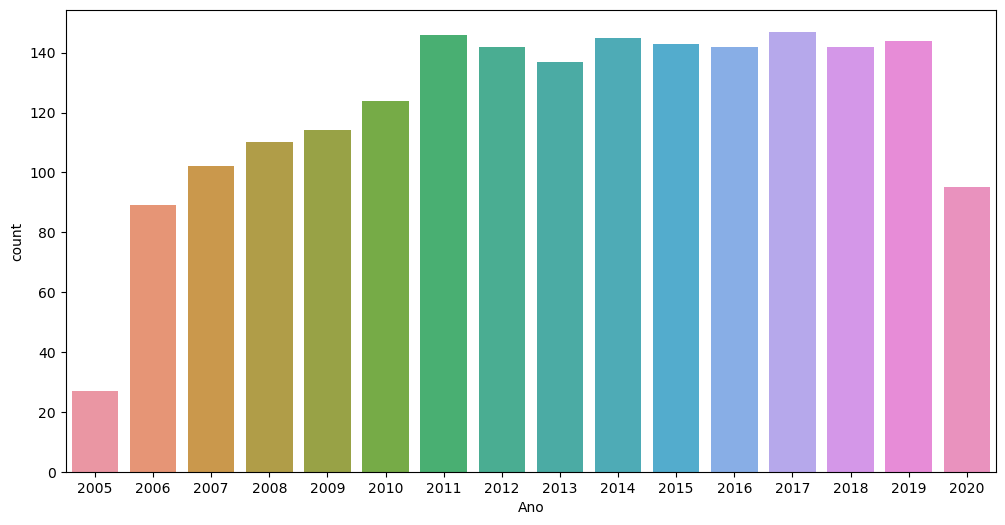

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x = data_socio.Ano)

# plt.title('Relação entre o Ano de Construção da Casa x Preço da Casa')
# plt.ylabel('Sale Price')
# plt.xlabel('Ano de Construção')

In [ ]:
Pergunta 1:O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer? Qual a correlação entre essas duas variáveis?

Pergunta 2: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?

Pergunta 3: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral? Qual a correlação entre essas duas variáveis?

Pergunta 4: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?

Pergunta 5: Pessoas generosas são mais felizes? 

1. Qual é a correlação entre o nível de confiança nos outros e a felicidade média dos países?
2. Há uma correlação entre o acesso à saúde e a felicidade das pessoas?
3. A liberdade para tomar decisões na vida influencia na felicidade das pessoas? Se sim, qual é a intensidade dessa influência?
4. O nível de desigualdade econômica em um país está relacionado com a felicidade das pessoas que vivem lá?
5. Existe uma correlação entre o nível de resiliência de uma sociedade e a sua felicidade média?

In [35]:
# registros por ano 

data_socio.Ano.value_counts()

[147, 146, 145, 144, 143, 142, 142, 142, 137, 124, 114, 110, 102, 95, 89, 27]

In [ ]:
media dos pais por PIB_Per_Capita, SuporteSocial, IndicadorNivelVida, ExpectativaVida, IndicadorLiberdade, IndicadorGenerosidade
IndicadorCorrupcao, IndicadorEmocoesPositivas, IndicadorEmocoesNegativas

In [88]:
data_socio.loc[:, data_socio.columns != 'year'].groupby('country_name').mean()

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
country_name,,,,,,,,,
Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500
Albania,5.019385,9.384385,0.716231,67.546154,0.662923,-0.082692,0.869385,0.653846,0.299231
Algeria,5.389875,9.328875,0.804694,65.290000,0.575014,-0.108224,0.705031,0.621125,0.263068
Angola,4.420250,8.990000,0.738250,53.550000,0.456250,-0.088250,0.866750,0.613500,0.351250
Argentina,6.310133,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,0.833467,0.284000
...,...,...,...,...,...,...,...,...,...
Venezuela,6.019867,9.457757,0.910133,65.958667,0.666400,-0.120372,0.795200,0.801800,0.260067
Vietnam,5.305857,8.655286,0.828039,66.928571,0.852477,0.002436,0.773964,0.650000,0.211039
Yemen,3.912250,8.313659,0.739833,54.866667,0.622417,-0.105149,0.805281,0.530500,0.293583
